<a href="https://colab.research.google.com/github/RishabParuchuri/Sunspot-Risk-Assessment/blob/main/Sunspot_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sunspot Risk Assessment
![picture](https://drive.google.com/file/d/1h3mpdBgmAxGz_zemglPpeMmMg84Dwv3D/view?usp=sharing)



> ### What are sunspots?

Sunspots are dark, planet-sized regions that appear on the "surface" of the Sun. Sunspots are "dark" because they are cooler than their surroundings. A large sunspot might have a central temperature of 4,000 K (about 3,700° C or 6,700° F), much lower than the 5,800 K (about 5,500° C or 10,000° F) temperature of the adjacent photosphere.

> ### Cause and effects

They are caused by disturbances in the Sun's magnetic field welling up to the photosphere, the Sun's visible "surface". The powerful magnetic fields in the vicinity of sunspots produce active regions on the Sun, which in turn frequently spawn disturbances such as solar flares and coronal mass ejections (CMEs). Because sunspots are associated with solar activity, space weather forecasters track these features in order to help predict outbursts of "solar storms".

> ### Impact on humanity

Although, solar flares are high radiations, this phenomenon is not dangerous to humans on the surface of the earth. The geomagnetic storm could have a technological impact on the man-made power grids and satellites, but not cause any effect to humans. Earlier in 1989, a strong solar eruption caused the Canadian Province of Quebec to lose power for nine hours, showcasing how big an effect it could have.

Database from SIDC - Solar Influences Data Analysis Center - the solar physics research department of the Royal Observatory of Belgium.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from scipy.stats import gaussian_kde

In [ ]:
df = pd.read_csv("/content/Sunspots.csv")

In [ ]:
df['Months After'] = np.arange(len(df))
df['Years After'] = df['Months After']/12

In [ ]:
d = df['Monthly Mean Total Sunspot Number'].mean()
print(d)

81.77877488514558


In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color="red")

In [ ]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [1]:
res = fit_sin(df["Years After"], df["Monthly Mean Total Sunspot Number"])
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

print(amp)

NameError: ignored

With the optimizer, I was able to gain more accurate values for the variables in the sinsoidal wave equation.

*  **Amplitude = 46.79187443091003**
*  **Angular frequency = 0.5710474010676966**
*  **Shift = 0.9622057286320136**
*  **Midpoint = 81.81724181410699**

Using the following equation, where ω is the angular frequency and Τ is the time period, I calculated the time period of one "solar cycle".

$$Τ = \frac{2π}{ω}$$

*  **Time Period = ** 


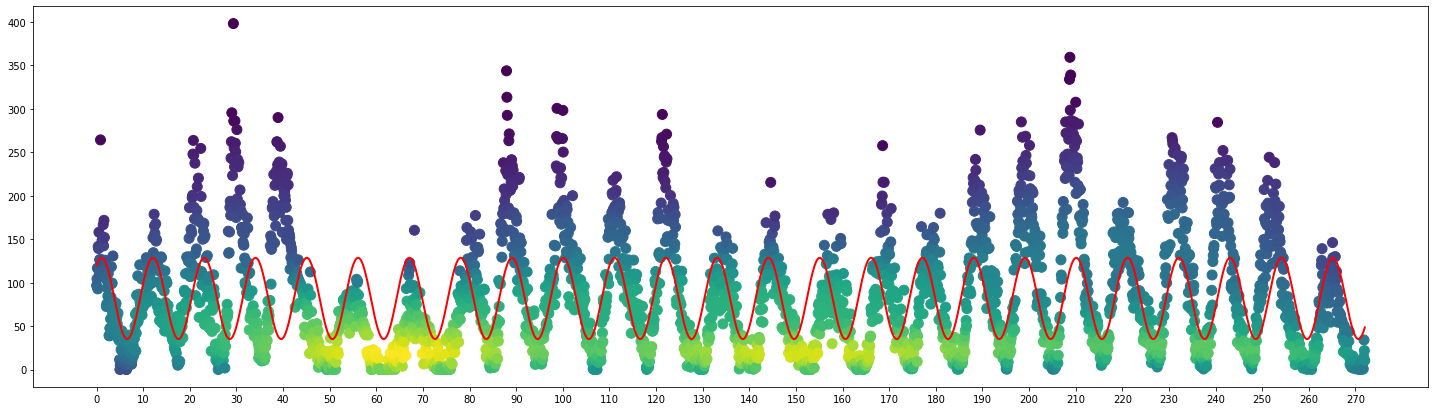

In [ ]:
plt.rcParams["figure.figsize"] = [25, 7]
xinterval = np.arange(0,280,10) 
plt.xticks(xinterval)

xy = np.vstack([df["Years After"],df["Monthly Mean Total Sunspot Number"]])
z = gaussian_kde(xy)(xy)


plt.scatter(df["Years After"], df["Monthly Mean Total Sunspot Number"], c=z, s=100)

plt.plot(df["Years After"], res["fitfunc"](df["Years After"]), "r-", label="y fit curve", linewidth=2)

plt.show()

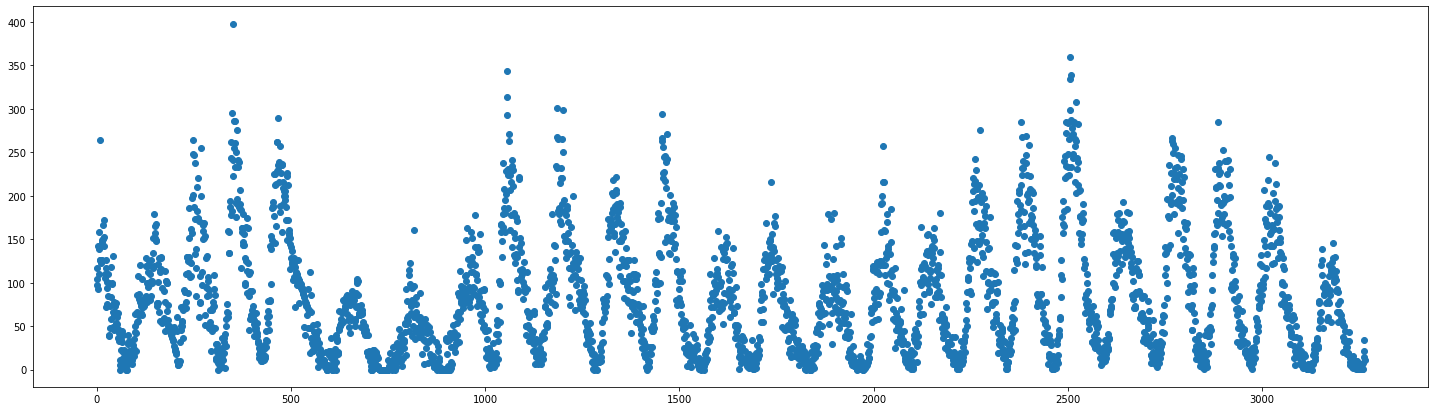

In [ ]:
plt.rcParams["figure.figsize"] = [25, 7]

df["Monthly Mean Total Sunspot Number"]
plt.scatter(df["Months After"], df["Monthly Mean Total Sunspot Number"])

In [ ]:
df["Years After"].head

<bound method NDFrame.head of 0         0.000000
1         0.083333
2         0.166667
3         0.250000
4         0.333333
           ...    
3260    271.666667
3261    271.750000
3262    271.833333
3263    271.916667
3264    272.000000
Name: Years After, Length: 3265, dtype: float64>